# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size*2, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size*2, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+(action_size*2), fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [9]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
LEARN_EVERY = 1         # learning timestep interval
LEARN_NUM = 5           # number of learning passes
GAMMA = 0.99            # discount factor
TAU = 8e-3              # for soft update of target parameters
OU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter, volatility
OU_THETA = 0.15         # Ornstein-Uhlenbeck noise parameter, speed of mean reversion
EPS_START = 5.0         # initial value for epsilon in noise decay process in Agent.act()
EPS_EP_END = 300        # episode to end the noise decay process
EPS_FINAL = 0           # final value for epsilon after decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, num_agents, random_seed):
        """Initialize an Agent object.
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            num_agents (int): number of agents
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.num_agents = num_agents
        self.seed = random.seed(random_seed)
        self.eps = EPS_START
        self.eps_decay = 1/(EPS_EP_END*LEARN_NUM)  # set decay rate based on epsilon end target
        self.timestep = 0

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise((num_agents, action_size), random_seed)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)

    def step(self, state, action, reward, next_state, done, agent_number):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        self.timestep += 1
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)
        # Learn, if enough samples are available in memory and at learning interval settings
        if len(self.memory) > BATCH_SIZE and self.timestep % LEARN_EVERY == 0:
                for _ in range(LEARN_NUM):
                    experiences = self.memory.sample()
                    self.learn(experiences, GAMMA, agent_number)

    def act(self, states, add_noise):
        """Returns actions for both agents as per current policy, given their respective states."""
        states = torch.from_numpy(states).float().to(device)
        actions = np.zeros((self.num_agents, self.action_size))
        self.actor_local.eval()
        with torch.no_grad():
            # get action for each agent and concatenate them
            for agent_num, state in enumerate(states):
                action = self.actor_local(state).cpu().data.numpy()
                actions[agent_num, :] = action
        self.actor_local.train()
        # add noise to actions
        if add_noise:
            actions += self.eps * self.noise.sample()
        actions = np.clip(actions, -1, 1)
        return actions

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma, agent_number):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        # Construct next actions vector relative to the agent
        if agent_number == 0:
            actions_next = torch.cat((actions_next, actions[:,2:]), dim=1)
        else:
            actions_next = torch.cat((actions[:,:2], actions_next), dim=1)
        # Compute Q targets for current states (y_i)
        Q_targets_next = self.critic_target(next_states, actions_next)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        # Construct action prediction vector relative to each agent
        if agent_number == 0:
            actions_pred = torch.cat((actions_pred, actions[:,2:]), dim=1)
        else:
            actions_pred = torch.cat((actions[:,:2], actions_pred), dim=1)
        # Compute actor loss
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)

        # update noise decay parameter
        self.eps -= self.eps_decay
        self.eps = max(self.eps, EPS_FINAL)
        self.noise.reset()

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0.0, theta=OU_THETA, sigma=OU_SIGMA):
        """Initialize parameters and noise process.
        Params
        ======
            mu (float)    : long-running mean
            theta (float) : speed of mean reversion
            sigma (float) : volatility parameter
        """
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.size = size
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size)
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [10]:
# MADDPG function

def maddpg(n_episodes=6000, max_t=1000, train_mode=True):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    scores_window = deque(maxlen=CONSEC_EPISODES)
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    already_solved = False 
    
    scores_deque = deque(maxlen=100)
    scores_ = []
    scores_avg = []
    
    weight_saved = False
    temp = True
    start1 = time.time()
    for i_episode in range(1, n_episodes+1):
        
        if temp == True:
            start = time.time()
            temp = False

        env_info = env.reset(train_mode=train_mode)[brain_name]         
        states = np.reshape(env_info.vector_observations, (1,48)) 
        for i in range(Number_of_agents):
            agent_list[i].reset()

        scores = np.zeros(num_agents)
        while True:
      
            action_0  = agent_list[0].act(states, ADD_NOISE)    
            action_1 = agent_list[1].act(states, ADD_NOISE)    
            actions = np.concatenate((action_0, action_1), axis=0).flatten()            
         
            env_info = env.step(actions)[brain_name]           
            next_states = np.reshape(env_info.vector_observations, (1, 48)) 
            rewards = env_info.rewards                        
            done = env_info.local_done  
            agent_list[0].step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
            agent_list[1].step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
            
            scores += np.max(rewards)  
            states = next_states 
            if np.any(done): 
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window)) 

        score_max = np.max(scores)
        scores_.append(score_max)
        scores_deque.append(score_max)
        score_avg = np.mean(scores_deque)
        scores_avg.append(score_avg)        
        
        # save best score                        
        if ep_best_score > best_score:
            best_score = ep_best_score
            best_episode = i_episode
        

        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode-PRINT_EVERY, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))
            print('Avg score: {:.2f}'.format(score_avg))  
            end = time.time()
            print("\rtime took : ", end - start, "\n")
            temp = True
            
        
        if moving_average[-1] >= SOLVED_SCORE:
            if not already_solved:
                print('<-- Environment solved in {:d} episodes! \
                \n<-- Moving Average: {:.3f} over past {:d} episodes'.format(
                    i_episode-CONSEC_EPISODES, moving_average[-1], CONSEC_EPISODES))
                print("\rSolved! In episode: {} \tAvg score: {:.2f}".format(i_episode+1, score_avg))
                already_solved = True
                # save weights
                
                for i in range(Number_of_agents):
                    torch.save(agent_list[0].actor_local.state_dict(), 'checkpoint_actor_'+str(i)+'.pth')
                    torch.save(agent_list[0].critic_local.state_dict(), 'checkpoint_critic_'+str(i)+'.pth')
                weight_saved = True
                
            elif ep_best_score >= best_score:
                print('<-- Best episode so far!\
                \nEpisode {:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode, ep_best_score, moving_average[-1]))
                print("Avg Score = ", score_avg)
                # save weights
                for i in range(Number_of_agents):
                    torch.save(agent_list[0].actor_local.state_dict(), 'checkpoint_actor_'+str(i)+'.pth')
                    torch.save(agent_list[0].critic_local.state_dict(), 'checkpoint_critic_'+str(i)+'.pth')
                weight_saved =True
                
            elif (i_episode-best_episode) >= 200:
                print('<-- Training stopped. Best score not matched or exceeded for 200 episodes')
                break
            else:
                continue
    if (weight_saved == False):
        for i in range(Number_of_agents):
            torch.save(agent_list[0].actor_local.state_dict(), 'checkpoint_actor_'+str(i)+'.pth')
            torch.save(agent_list[0].critic_local.state_dict(), 'checkpoint_critic_'+str(i)+'.pth')

    print ("weight_saved = ", weight_saved)
    end1 = time.time()
    print("\rtotal time took  ", end1 - start1, "\n")
    return scores_all, moving_average, scores_, scores_avg

In [12]:
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch
import time

# initialize agents
SOLVED_SCORE = 0.7
# CONSEC_EPISODES = 100
CONSEC_EPISODES = 150

PRINT_EVERY = 10
ADD_NOISE = True

Number_of_agents = 2
agent_list = []

agent_list = [ Agent(state_size, action_size, num_agents = 1, random_seed=0) for i in range(Number_of_agents)]


In [15]:
agent_list

[<__main__.Agent at 0x7ff490ec8a20>, <__main__.Agent at 0x7ff45e812dd8>]

In [16]:
scores, avgs , scores_, scores_avg= maddpg()

Episodes 0000-0010	Max Reward: 0.100	Moving Average: 0.020
Avg score: 0.02
time took :  9.179224491119385 

Episodes 0010-0020	Max Reward: 0.100	Moving Average: 0.015
Avg score: 0.02
time took :  19.18510913848877 

Episodes 0020-0030	Max Reward: 0.000	Moving Average: 0.010
Avg score: 0.01
time took :  17.65794324874878 

Episodes 0030-0040	Max Reward: 0.100	Moving Average: 0.010
Avg score: 0.01
time took :  19.63831925392151 

Episodes 0040-0050	Max Reward: 0.200	Moving Average: 0.016
Avg score: 0.02
time took :  26.463672876358032 

Episodes 0050-0060	Max Reward: 0.000	Moving Average: 0.013
Avg score: 0.01
time took :  17.094412326812744 

Episodes 0060-0070	Max Reward: 0.100	Moving Average: 0.013
Avg score: 0.01
time took :  19.64070177078247 

Episodes 0070-0080	Max Reward: 0.300	Moving Average: 0.016
Avg score: 0.02
time took :  29.48046112060547 

Episodes 0080-0090	Max Reward: 0.100	Moving Average: 0.017
Avg score: 0.02
time took :  22.319156885147095 

Episodes 0090-0100	Max Re

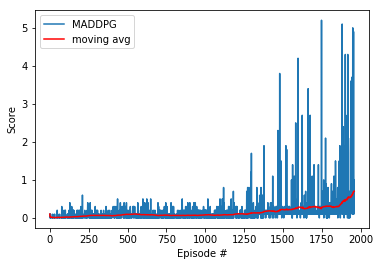

In [30]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

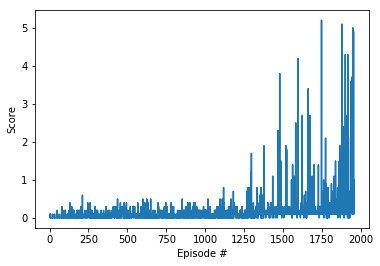

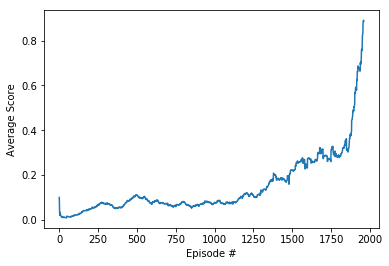

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_)+1), scores_)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show()

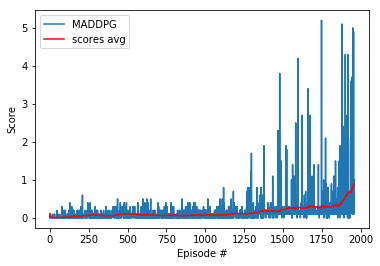

In [32]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores_, label='MADDPG')
plt.plot(np.arange(len(scores)), scores_avg, c='r', label='scores avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [33]:
import pandas as pd


In [46]:
data_rahul = pd.DataFrame([scores_, scores_avg, scores, avgs]).transpose()
data_rahul.columns=['scores_','scores_avg','scores', 'avgs']
data_rahul.head()

,scores_,scores_avg,scores,avgs
0,0.1,0.100000,0.1,0.100000
1,0.0,0.050000,0.0,0.050000
2,0.0,0.033333,0.0,0.033333
3,0.0,0.025000,0.0,0.025000
4,0.0,0.020000,0.0,0.020000


In [47]:
data_rahul.to_csv("results.csv", header=True)

In [ ]:
# env.close()